# QC analysis of single cell barcode dataset: This notebook will guide you through the process of quality control analyis on a single-cell RNA sequencing barcode dataset

In [3]:
# Different scenario for original dataset or test dataset
if DS_test==True:
    DSID = test_DatasetID
    Version = '2'   # the version of your dataset
    DEV = True
elif len(alt_experiments)==2:
    DSID = DatasetID
    Version = '4'   # the version of your dataset
    your_experiment = "crispr_hashing_harmonized" # A string that is a key known for our desired experimnet that you wish to work on
else:
    DSID = DatasetID
    Version = '2'   # the version of your dataset
    your_experiment = "main" # A string that is a key known for our desired experimnet that you wish to work on

New_experiment = "raw_qc" # A string that is a key known for the updated data saved by that that name
min_counts_cutoff = 2
min_margin = 3

In [4]:
## Import Libraries

from __future__ import division
%matplotlib inline 

#single cell libraries
import scanpy as sc


#general
import pandas as pd
import sys, os
import numpy as np
import scipy
from scipy import stats
import itertools
from glob import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from collections import OrderedDict 
from scipy.stats import zscore

#plotting
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [5]:
import sys
sys.path.append("..")
import Templates.tools.DatasetDB as DB
import Templates.tools.scBarcodeProc as Bproc
import Templates.tools.Barcode_Count_QC as bar

In [6]:
%load_ext autoreload
%autoreload 2

## Instantiate a dataset object given our dataset info

In [7]:
DS = DB.DATASET(DSID, DEV, title=title, description=description, name_space=name_space, organism=organism,
                       sources=sources, tech_name=tech_name, author=author)

In [8]:
adata, adatas = DS.load_dataset(Version, your_experiment, Corr=False)


13:51:21 -> Collating dataset: 'DS000015492' metadata.
13:51:21 -> Retrieving all project: 'DS000015492@2' metadata.

13:51:21 -> Reading: 'DS000015492'.

13:51:21 -> Reading: 'DS000015492 -> Experiment: main'.

13:51:21 -> Reading: 'DS000015492 -> Experiment: main -> Alt. Exp.: hashing'.


In [ ]:
adata.obs['Sample'] = adata.obs['Sample']+"_rep"+adata.obs['10Xrun']

In [9]:
adata = bar.adata_cleaner (adata, adatas, experiment=experiment, fix_barcodes=fix_barcodes, alt_experiments=alt_experiments)

In [10]:
adata

AnnData object with n_obs × n_vars = 47388 × 96
    obs: 'Sample', 'Barcode', 'demux_type', 'assignment'
    uns: '.internal'
    layers: 'counts'

In [15]:
adata.obs.head()

,Sample,Barcode,demux_type,assignment
SAM24424070_Replicate1-AAACCCAAGACGTCGA-1,SAM24424070_Replicate1,AAACCCAAGACGTCGA-1,singlet,DLD1-infected-not-transfected
SAM24424070_Replicate1-AAACCCAAGAGATTCA-1,SAM24424070_Replicate1,AAACCCAAGAGATTCA-1,singlet,DLD1-infected-not-transfected
SAM24424070_Replicate1-AAACCCAAGCCAGACA-1,SAM24424070_Replicate1,AAACCCAAGCCAGACA-1,singlet,DLD1-infected-not-transfected
SAM24424070_Replicate1-AAACCCAAGCGATGCA-1,SAM24424070_Replicate1,AAACCCAAGCGATGCA-1,singlet,DLD1-infected-not-transfected
SAM24424070_Replicate1-AAACCCAAGGATATGT-1,SAM24424070_Replicate1,AAACCCAAGGATATGT-1,singlet,DLD1-infected-not-transfected
...,...,...,...,...
SAM24424071_Replicate1-TTTGTTGTCGCCGAAC-1,SAM24424071_Replicate1,TTTGTTGTCGCCGAAC-1,singlet,DLD1-infected-transfected
SAM24424071_Replicate1-TTTGTTGTCGCGAAGA-1,SAM24424071_Replicate1,TTTGTTGTCGCGAAGA-1,singlet,DLD1-infected-transfected
SAM24424071_Replicate1-TTTGTTGTCGCTGTCT-1,SAM24424071_Replicate1,TTTGTTGTCGCTGTCT-1,singlet,DLD1-infected-transfected
SAM24424071_Replicate1-TTTGTTGTCGTCACCT-1,SAM24424071_Replicate1,TTTGTTGTCGTCACCT-1,singlet,DLD1-infected-transfected


## Margin vs. DemuxEM

In [ ]:
# process array
df = Bproc.proc_array(adata, key=experiment)

In [ ]:
# assign identities
df = Bproc.assign_gRNA_identity(df=df, key=experiment, min_counts_cutoff=min_counts_cutoff, min_margin=min_margin)

In [ ]:
df = adata.obs.join(df)

In [ ]:
df_g = df.copy()
df_g=df_g.rename(columns={"demux_type":f'DemuxType_{experiment}'})
df_p = pd.crosstab(df_g[f'marginType_{experiment}'], df_g[f'DemuxType_{experiment}'])

In [ ]:
with plt.rc_context({"figure.dpi": (150)}):
    sns.heatmap(df_p, square=True, cmap='coolwarm', linewidths=2, linecolor='white', annot=True, fmt='g')

## Basic Counts

In [16]:
Bproc.count_features(adata, ['Sample'])

,Sample,cnt,pct
0,SAM24424070_Replicate1,18270,100.0
1,SAM24424071_Replicate1,18801,100.0


In [17]:
adata.obs["demux_type"]=adata.obs["demux_type"].fillna("unknown")

In [18]:
agg = Bproc.count_features(adata, ['Sample', 'demux_type'])
agg = pd.pivot_table(agg, values='pct', index=['Sample'], columns=['demux_type'])

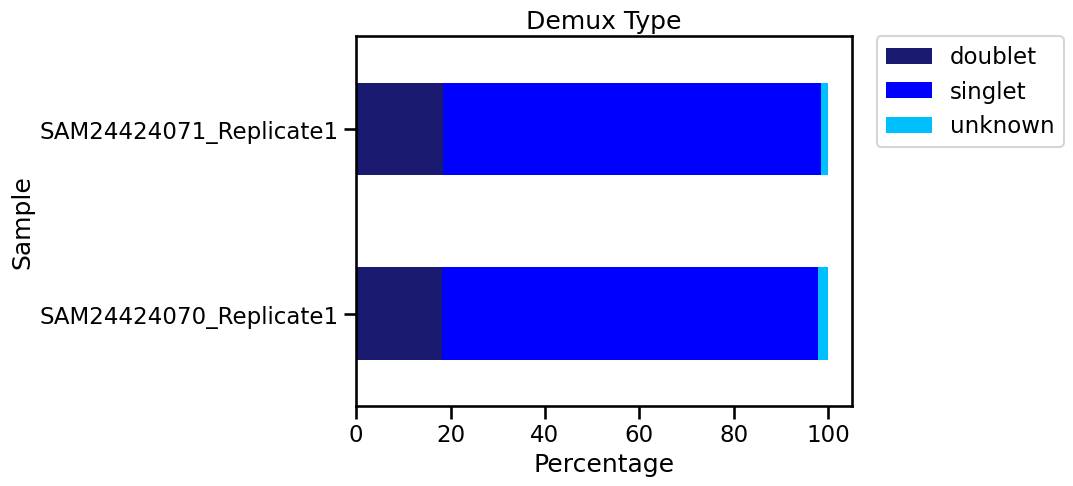

In [19]:
agg.plot(kind='barh', stacked=True, color=['midnightblue', 'blue', 'deepskyblue'])
plt.title('Demux Type')
plt.xlabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

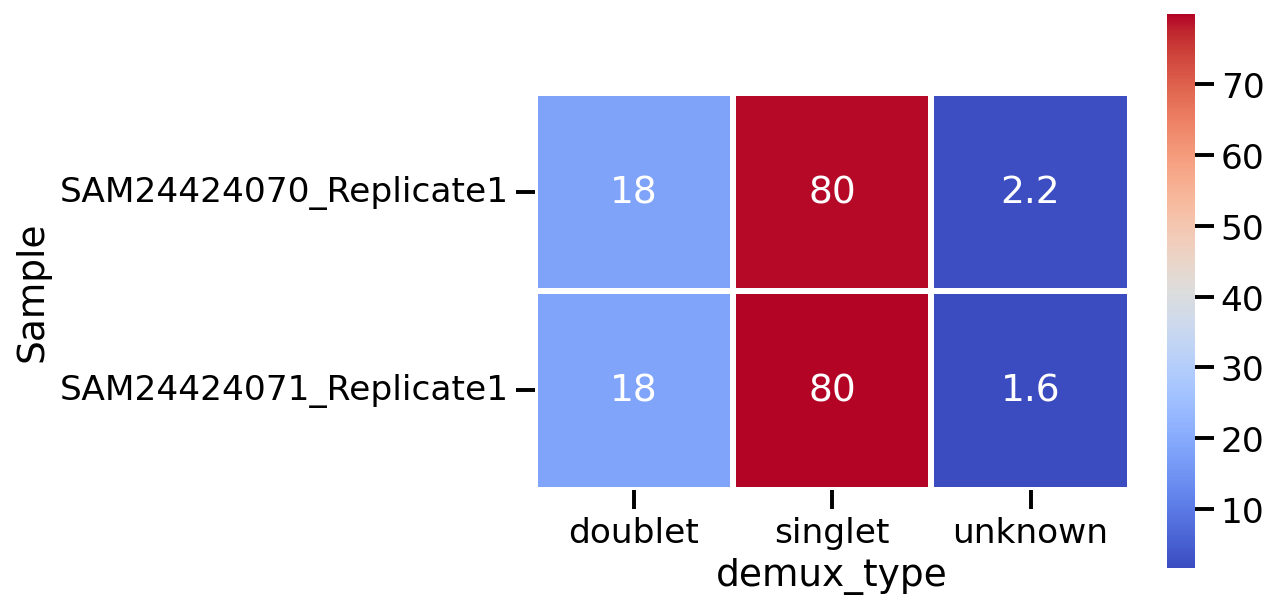

In [20]:
with plt.rc_context({"figure.dpi": (150)}):
    sns.heatmap(agg, square=True, cmap='coolwarm', linewidths=2, linecolor='white', annot=True)

In [21]:
if fix_barcodes == True:
    demux_singlet = 'valid_doublet'
else:
    demux_singlet = 'singlet'
    demux_doublet = 'doublet'
    
singlets = Bproc.count_features(adata[(adata.obs['demux_type']==demux_singlet).astype('bool')], ['assignment']).sort_values(by='cnt', ascending=False)
doublets = Bproc.count_features(adata[(adata.obs['demux_type']==demux_doublet).astype('bool')], ['assignment']).sort_values(by='cnt', ascending=False)

In [22]:
singlets

,assignment,cnt,pct
1,DLD1-infected-transfected,15022,100.0
0,DLD1-infected-not-transfected,14526,100.0


<Axes: xlabel='cnt', ylabel='assignment'>

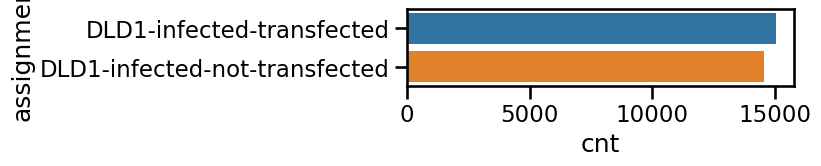

In [23]:
if experiment == "crispr":
    f, ax = plt.subplots(figsize=(5, len(singlets.head(20))*0.5))
    sns.barplot(data=singlets.head(20), y='assignment', x='cnt')
else:
    f, ax = plt.subplots(figsize=(5, len(singlets)*0.5))
    sns.barplot(data=singlets, y='assignment', x='cnt')

In [ ]:
if experiment == "crispr":
    adata = adata[:,adata.var_names.isin(singlets.head(5000)["assignment"].tolist())]
    adata.layers['counts'] = adata.layers['counts'].astype("float32")

###  Select top barcodes raw data

In [24]:
topBC = adata.to_df().mean().sort_values(ascending=False).index.tolist()[:topBarcodesToPlot]
bottomBC = adata.to_df().mean().sort_values(ascending=False).index.tolist()[-bottomBarcodesToPlot:]

##  Center log ratio normalization and embedding

In [25]:
adata = Bproc.procBC(adata, n_pcs=50, n_neighbors=10)

applying center log ratio
computing pca
computing neighbors
computing umap


## Plot top barcodes normalized data

In [26]:
df = Bproc.meltdf(adata, topBC)
df.columns = ['BC', 'value']

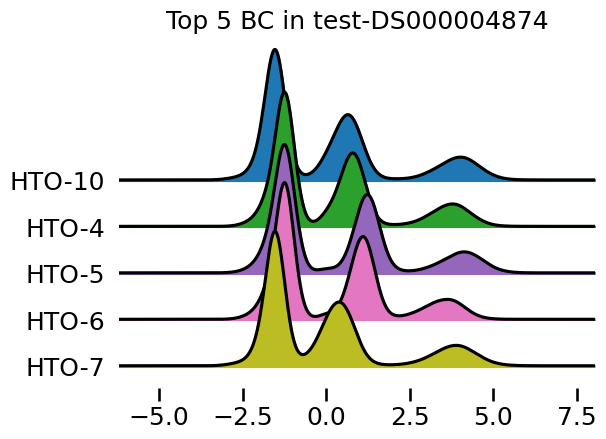

In [27]:
if topBarcodesToPlot >5:
    Bproc.plot_ridge(df, title='Top ' + str(topBarcodesToPlot) + ' BC in ' + DSID, 
                    figsize=(5, (topBarcodesToPlot*0.9)))
    
else:
    Bproc.plot_ridge(df, title='Top ' + str(topBarcodesToPlot) + ' BC in ' + DSID,
                    xlim='own')

## Repaet for only singlets

In [28]:
df = Bproc.meltdf(adata[(adata.obs['demux_type']==demux_singlet).astype('bool')], topBC)
df.columns = ['BC', 'value']

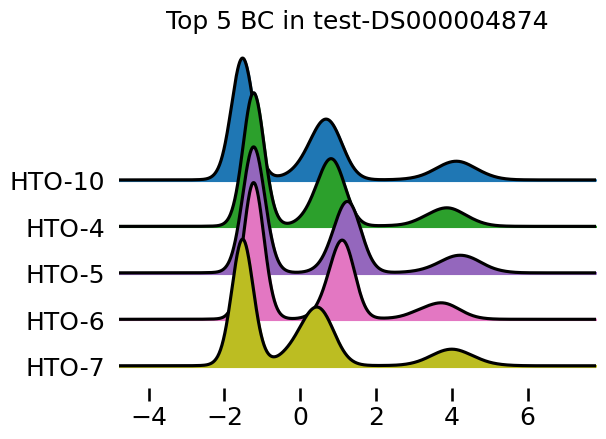

In [29]:
 if topBarcodesToPlot >5:
    Bproc.plot_ridge(df, title='Top ' + str(topBarcodesToPlot) + ' BC in ' + DSID, 
                    figsize=(5, (topBarcodesToPlot*0.9)))
    
else:
    Bproc.plot_ridge(df, title='Top ' + str(topBarcodesToPlot) + ' BC in ' + DSID,
                    xlim='own')

##  Plot bottom barcodes normalized data

In [30]:
df = Bproc.meltdf(adata, bottomBC)
df.columns = ['BC', 'value']

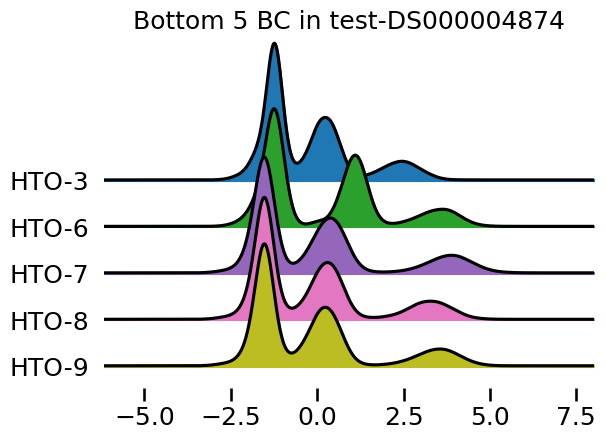

In [31]:
 if bottomBarcodesToPlot >5:
    Bproc.plot_ridge(df, title='Bottom ' + str(bottomBarcodesToPlot) + ' BC in ' + DSID, 
                    figsize=(5, (topBarcodesToPlot*0.9)))
    
else:
    Bproc.plot_ridge(df, title='Bottom ' + str(bottomBarcodesToPlot) + ' BC in ' + DSID)

## Dot Plots

### Singlets

In [32]:
var_order = adata[(adata.obs['demux_type']==demux_singlet).astype('bool')].var_names.tolist()
var_order.sort()

cat_order = adata[(adata.obs['demux_type']==demux_singlet).astype('bool')].obs['assignment'].unique().tolist()
if experiment == 'crispr':
    cat_order.sort()

/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


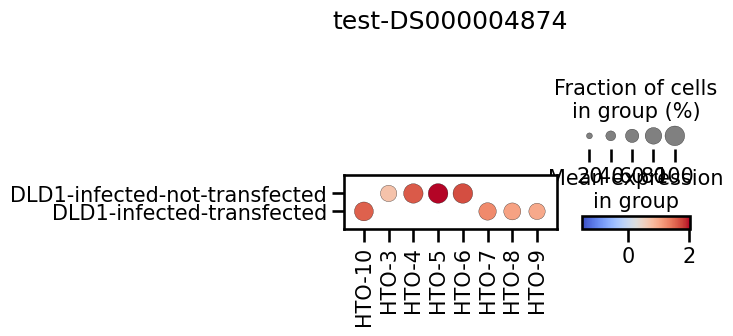

In [33]:
if experiment == 'hashing':
    sc.pl.dotplot(adata[(adata.obs['demux_type']==demux_singlet).astype('bool')], var_names=var_order, 
              groupby='assignment', categories_order=cat_order,
              cmap='coolwarm', title=DSID)

## UMAP visualizations

/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


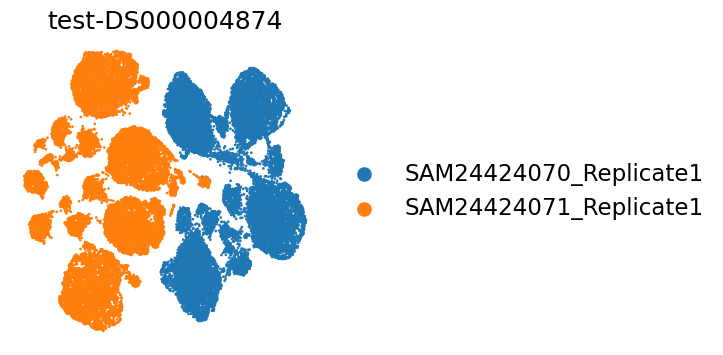

In [34]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (100)}):
    sc.pl.umap(adata, color=['Sample'], s=15, frameon=False, title=DSID)

/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


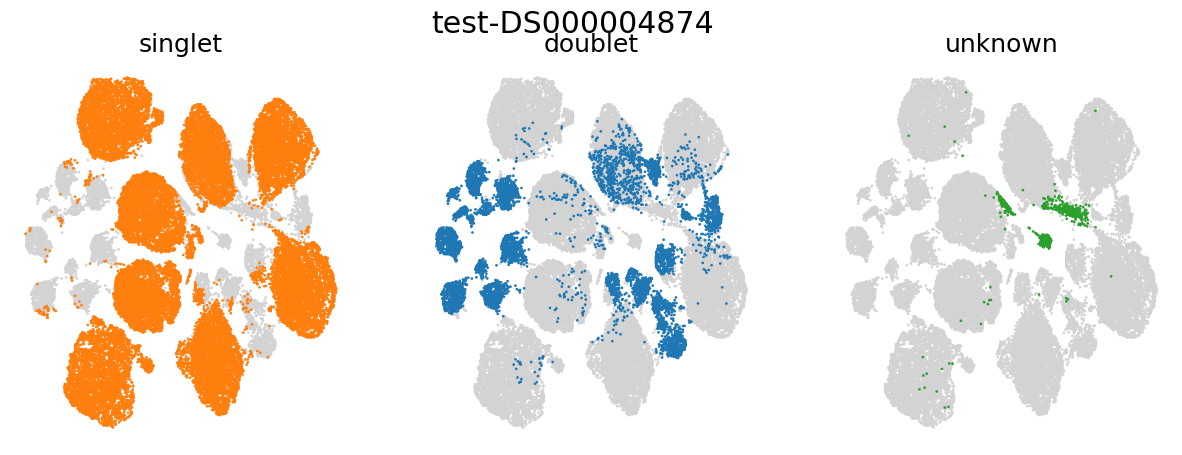

In [35]:
with plt.rc_context({"figure.dpi": (100)}):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    sc.pl.umap(adata, color=['demux_type'], s=15, frameon=False, groups=[demux_singlet], show=False, legend_loc='', title=demux_singlet, ax=ax1)
    sc.pl.umap(adata, color=['demux_type'], s=15, frameon=False, groups=['doublet'], show=False, legend_loc='', title='doublet', ax=ax2)
    sc.pl.umap(adata, color=['demux_type'], s=15, frameon=False, groups=['unknown'], show=False, legend_loc='', title='unknown', ax=ax3)
    f.suptitle(DSID, y=0.98)

/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


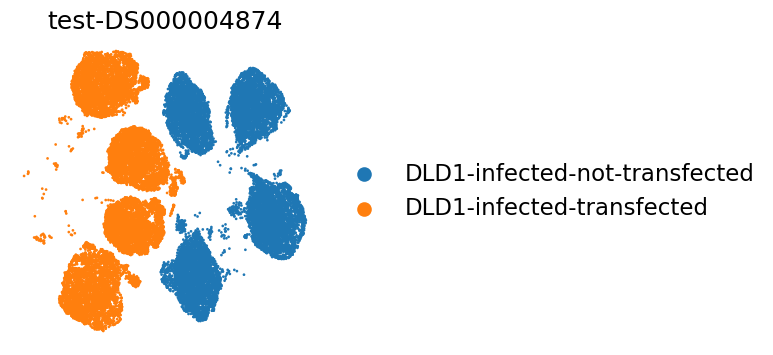

In [36]:
if experiment == 'hashing':
    with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (100)}):
        sc.pl.umap(adata[adata.obs['demux_type']==demux_singlet], color=['assignment'], s=15, frameon=False, title=DSID)

### Top BC

/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


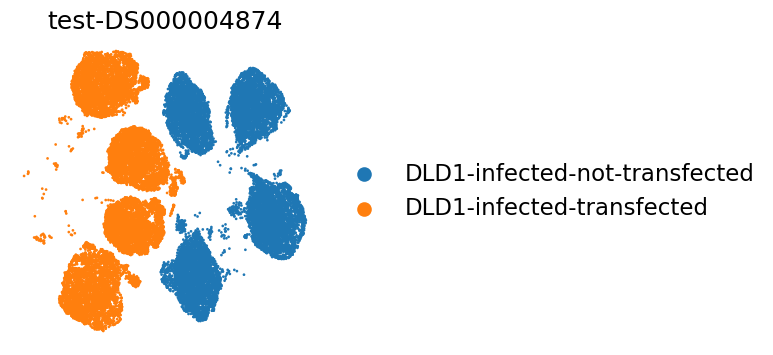

In [37]:
if experiment == 'hashing':
    with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (100)}):
        sc.pl.umap(adata[adata.obs['demux_type']==demux_singlet], color=['assignment'], s=15, 
               frameon=False, groups=singlets.assignment.tolist()[:topBarcodesToPlot], title=DSID)

### bottom 5

/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


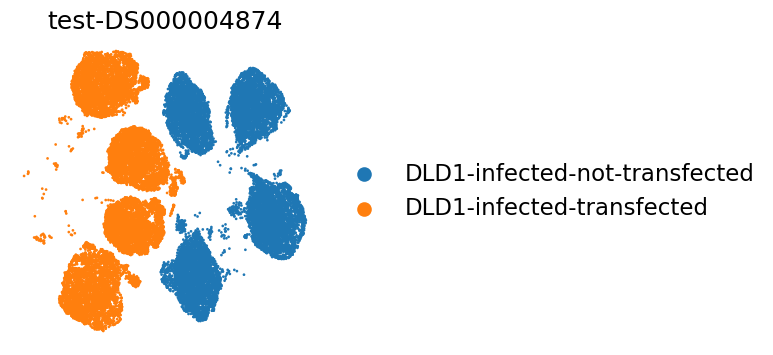

In [38]:
if experiment == 'hashing':
    with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (100)}):
        sc.pl.umap(adata[adata.obs['demux_type']==demux_singlet], color=['assignment'], s=15, 
               frameon=False, groups=singlets.assignment.tolist()[bottomBarcodesToPlot:], title=DSID)

## View Anndata object

In [39]:
adata

AnnData object with n_obs × n_vars = 37071 × 8
    obs: 'Sample', 'Barcode', 'demux_type', 'assignment'
    uns: '.internal', 'pca', 'neighbors', 'umap', 'Sample_colors', 'demux_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'